## **0- Veri Setinin Hazırlanması**

In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breastcancerproteomes/clinical_data_breast_cancer.csv
/kaggle/input/breastcancerproteomes/PAM50_proteins.csv
/kaggle/input/breastcancerproteomes/77_cancer_proteomes_CPTAC_itraq.csv


In [39]:
# Veri setini notebook içerisine aldım
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/breastcancerproteomes/clinical_data_breast_cancer.csv")
df = df_.copy()

## **1- Veriye İlk Bakış**

In [40]:
# Veri setini görmek için genel bilgi edinme
df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1


In [41]:
# Veri setindeki satır ve sütun sayılarını .shape kullanarak görebiliriz
df.shape # -> (satır, sütun)

(105, 30)

In [42]:
# Veri setiyle alakalı bilgi vermesi için
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis                           105 non-null    object 
 11  Metastasis-Coded                

In [43]:
df.columns

Index(['Complete TCGA ID', 'Gender', 'Age at Initial Pathologic Diagnosis',
       'ER Status', 'PR Status', 'HER2 Final Status', 'Tumor',
       'Tumor--T1 Coded', 'Node', 'Node-Coded', 'Metastasis',
       'Metastasis-Coded', 'AJCC Stage', 'Converted Stage',
       'Survival Data Form', 'Vital Status', 'Days to Date of Last Contact',
       'Days to date of Death', 'OS event', 'OS Time', 'PAM50 mRNA',
       'SigClust Unsupervised mRNA', 'SigClust Intrinsic mRNA',
       'miRNA Clusters', 'methylation Clusters', 'RPPA Clusters',
       'CN Clusters', 'Integrated Clusters (with PAM50)',
       'Integrated Clusters (no exp)', 'Integrated Clusters (unsup exp)'],
      dtype='object')

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Initial Pathologic Diagnosis,105.0,58.685714,13.066630,30.0,49.0,58.0,67.0,88.0
Days to Date of Last Contact,105.0,788.390476,645.283040,0.0,240.0,643.0,1288.0,2850.0
Days to date of Death,105.0,1096.440476,594.304775,160.0,240.0,1154.5,1692.0,2483.0
OS event,105.0,0.104762,0.307715,0.0,0.0,0.0,0.0,1.0
OS Time,105.0,817.647619,672.026613,0.0,240.0,665.0,1305.0,2850.0
SigClust Unsupervised mRNA,105.0,-4.885714,3.558074,-12.0,-6.0,-5.0,-3.0,0.0
SigClust Intrinsic mRNA,105.0,-7.180952,5.022605,-13.0,-12.0,-6.0,-2.0,0.0
miRNA Clusters,105.0,4.000000,1.593255,1.0,3.0,4.0,5.0,7.0
methylation Clusters,105.0,3.342857,1.406226,1.0,2.0,4.0,4.0,5.0
CN Clusters,105.0,2.590476,1.342323,1.0,1.0,3.0,3.0,5.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


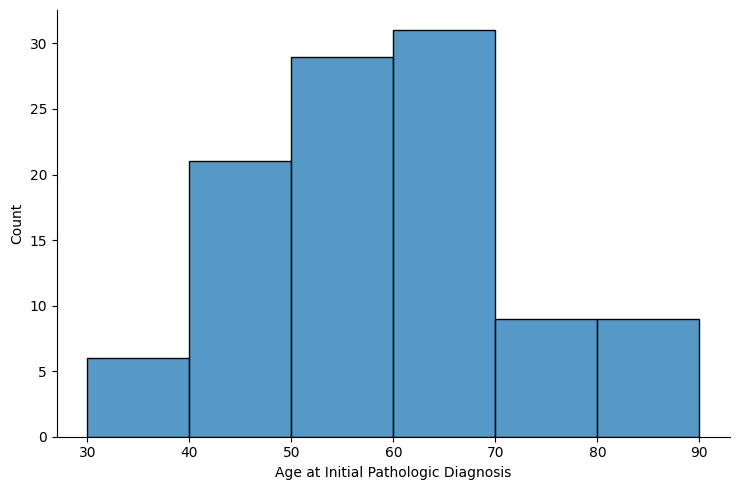

In [44]:
# İlk tanı sırasındaki yaş aralıkları
sns.displot(df['Age at Initial Pathologic Diagnosis'], 
            kde=False, bins=[30,40,50,60,70,80,90], aspect=1.5)


***Bu grafiğe göre ilk patolojik teşhislerin en yoğun olarak 50-60 yaş aralığında yapıldığıdır. Diğer yaş aralıklarına göre bu aralıkta teşhis sayısı daha yüksektir. 30-40 yaş aralığında ve 70-80 yaş aralığında teşhis sayısı daha düşüktür. 80-90 yaş aralığında ise yaklaşık 10 kişiye yakın teşhis almıştır.***

## **2- Eksik Veri Analizi**

In [45]:
# Toplamda kaç adet eksik veri kaydı olduğunu gösterir
df.isna().sum()

Complete TCGA ID                        0
Gender                                  0
Age at Initial Pathologic Diagnosis     0
ER Status                               0
PR Status                               0
HER2 Final Status                       0
Tumor                                   0
Tumor--T1 Coded                         0
Node                                    0
Node-Coded                              0
Metastasis                              0
Metastasis-Coded                        0
AJCC Stage                              0
Converted Stage                         0
Survival Data Form                      0
Vital Status                            0
Days to Date of Last Contact            0
Days to date of Death                  94
OS event                                0
OS Time                                 0
PAM50 mRNA                              0
SigClust Unsupervised mRNA              0
SigClust Intrinsic mRNA                 0
miRNA Clusters                    

***Veri setimde eksik değer olduğu için eksik değer yaratmıyorum.***

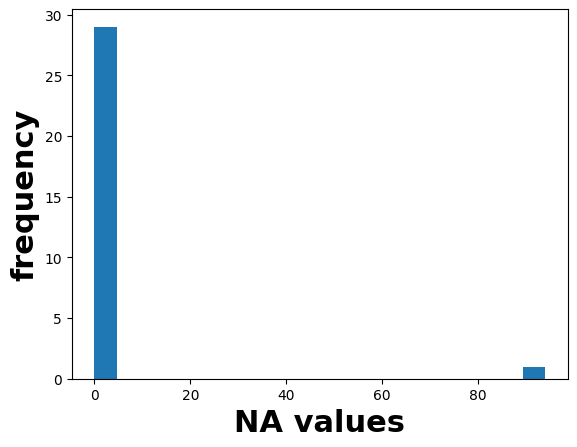

In [46]:
# NA değerlerinin dağılımını görselleştirme
na_val = df.isna().sum()
na_val.sort_values(ascending=False).plot(kind='hist',bins=20) # sıralamanın azalana doğru
plt.ylabel('frequency',fontsize=22,weight='bold')
plt.xlabel('NA values',fontsize=22,weight='bold')
plt.show()

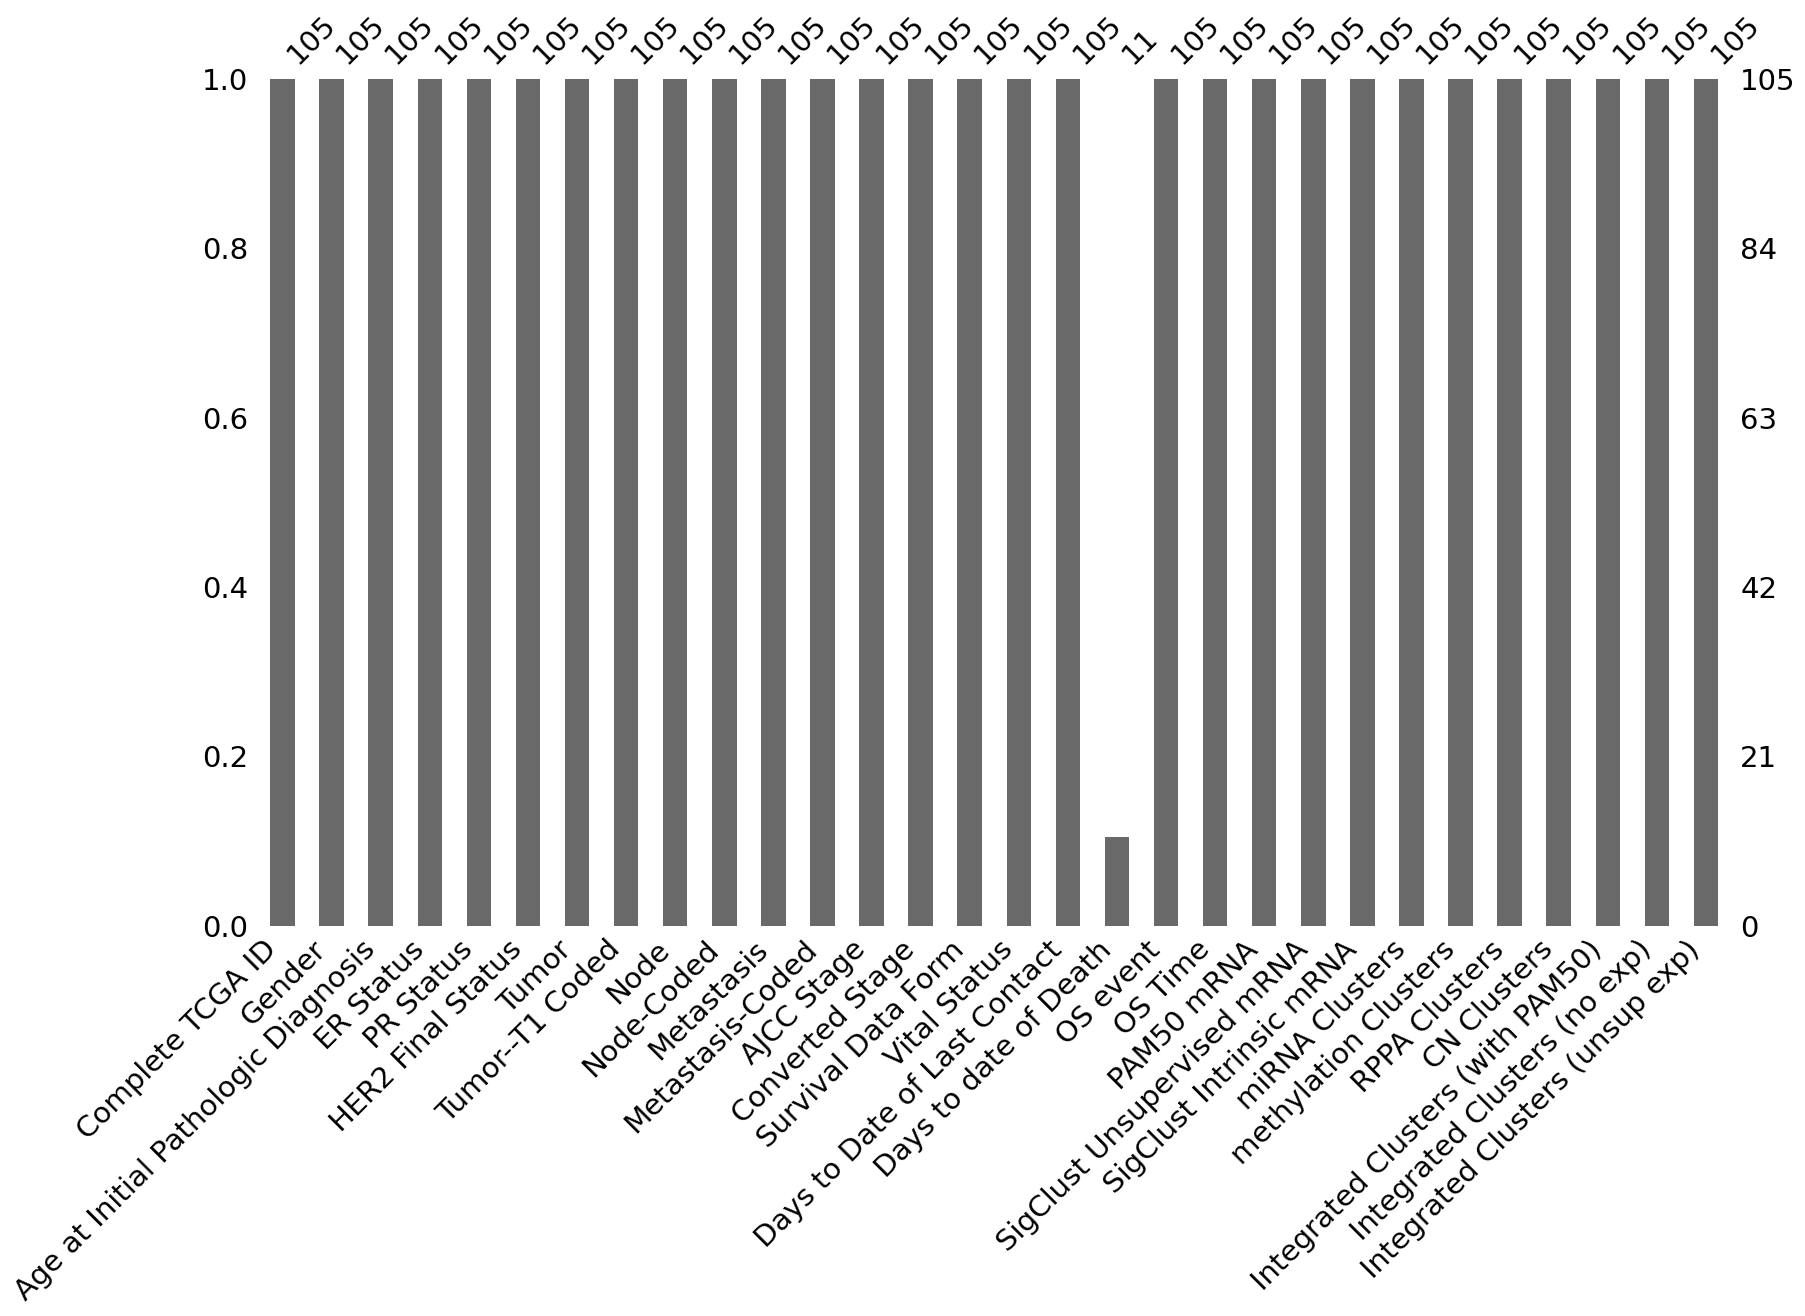

In [47]:
# Veri kümesindeki her sütundaki eksik veri miktarı
!pip install missingno # -> kütüphaneyi yükledik
import missingno as msno

msno.bar(df = df,
        figsize = (19,11),
        fontsize = 21);


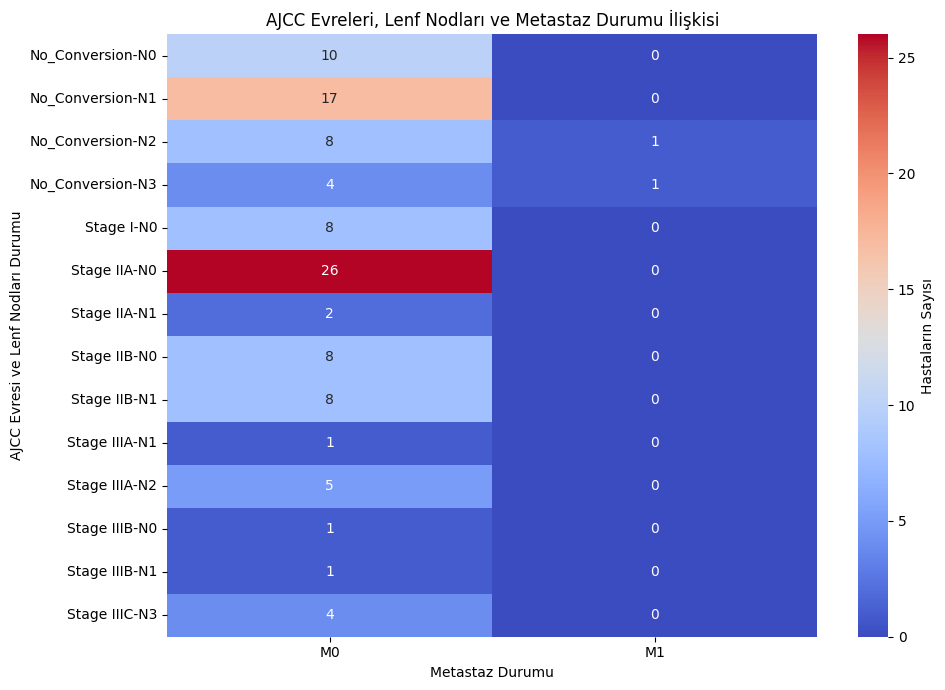

In [62]:
# AJCC Evresi, Lenf Nodları ve Metastaz durumları arasındaki ilişkiyi crosstab ile hesapla
heatmap_data = pd.crosstab([df['Converted Stage'], df['Node']], df['Metastasis'])

# Isı haritası ile ilişkiyi görselleştir (coolwarm paleti)
plt.figure(figsize=(10,7))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Hastaların Sayısı'})
plt.title('AJCC Evreleri, Lenf Nodları ve Metastaz Durumu İlişkisi')
plt.xlabel('Metastaz Durumu')
plt.ylabel('AJCC Evresi ve Lenf Nodları Durumu')
plt.tight_layout()
plt.show()

***No_Conversion-N1 durumunda 17 hasta bulunmaktadır ve bu hastaların hiçbirinde metastaz (M1) yoktur.***

***Stage I-N0 durumunda 8 hasta bulunmaktadır ve bu hastaların hiçbirinde metastaz (M1) yoktur.***

***Stage IIA-N0 durumunda 26 hasta bulunmaktadır ve bu hastaların hiçbirinde metastaz (M1) yoktur.***

***No_Conversion-N2 ve No_Conversion-N3 durumlarında sırasıyla 1'er hasta metastaz (M1) durumundadır. Diğer evrelerde ve lenf nodları durumlarında metastaz (M1) durumu gözlenmemektedir.***

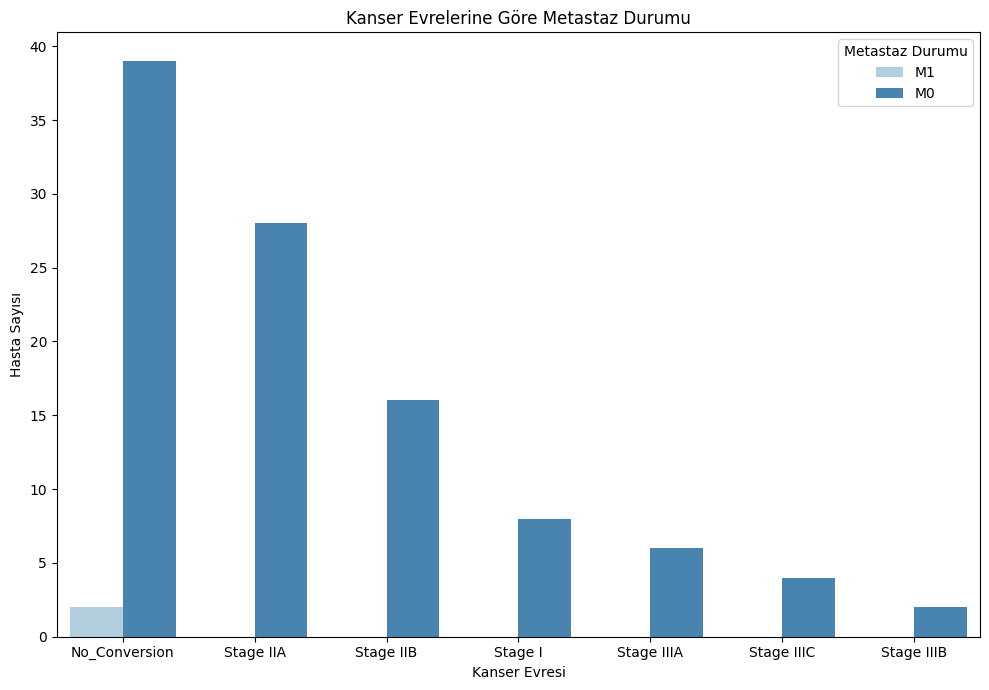

In [67]:
# Kanser evrelerine göre metastaz durumu
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Converted Stage', hue='Metastasis', palette='Blues')
plt.title('Kanser Evrelerine Göre Metastaz Durumu')
plt.xlabel('Kanser Evresi')
plt.ylabel('Hasta Sayısı')
plt.legend(title='Metastaz Durumu', loc='upper right')
plt.tight_layout()
plt.show()


***No_Conversion evresinde en fazla hasta bulunmaktadır ve bu hastaların çoğu metastaz (M0) durumu göstermemektedir.***

***Stage IIA ve Stage IIB evrelerinde de hasta sayısı yüksektir ve bu evrelerde de metastaz (M0) durumu daha yaygındır.***

***Diğer evrelerde hasta sayısı daha düşüktür ve genel olarak metastaz (M0) durumu daha yaygındır.***

***Metastaz (M1) durumu, No_Conversion-N2 ve No_Conversion-N3 evrelerinde az sayıda hastada gözlenmektedir.***

In [49]:
df["Days to date of Death"]

0       240.0
1       754.0
2      1555.0
3      1692.0
4         NaN
        ...  
100       NaN
101       NaN
102       NaN
103       NaN
104       NaN
Name: Days to date of Death, Length: 105, dtype: float64

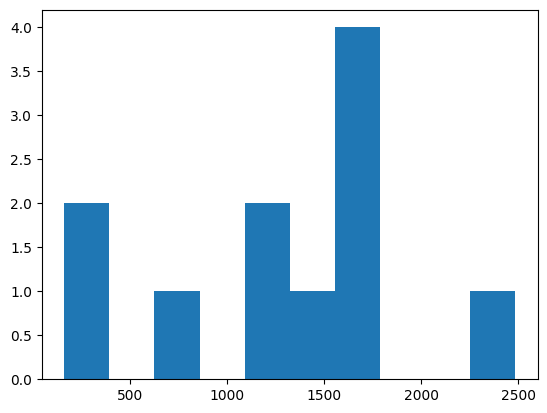

In [50]:
# Sayısal değişkenin dağılımını görmek için histograma bakabiliriz
plt.hist(df["Days to date of Death"])
plt.show()

## **3-Eksik Verilerin Doldurulması**

In [51]:
# Toplam satır sayısı
total_rows = len(df)
print(f"Toplam Satır Sayısı: {total_rows}")

# "Days to date of Death" sütununun dolu ve boş değer sayısı
filled_count = df["Days to date of Death"].notnull().sum()  # Dolu değer sayısı
missing_count = df["Days to date of Death"].isnull().sum()  # Eksik (NaN) değer sayısı

print(f"Dolu Satır Sayısı ('Days to date of Death'): {filled_count}")
print(f"Boş (NaN) Satır Sayısı ('Days to date of Death'): {missing_count}")


Toplam Satır Sayısı: 105
Dolu Satır Sayısı ('Days to date of Death'): 11
Boş (NaN) Satır Sayısı ('Days to date of Death'): 94


***Sonuç olarak 94 boş değer, 11 dolu değerimiz var. Eksik verileri doldurarak, verinin bütünlüğünü koruyup daha fazla analiz yapılabilmem açısından mantıklı buldum.***

In [52]:
# Yaş gruplarına göre 'Days to date of Death' medyanını hesaplayalım
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']

# Yaş grubu bazında 'Days to date of Death' medyanını hesapla
median_per_age_group = df.groupby(pd.cut(df['Age at Initial Pathologic Diagnosis'], bins=bins, labels=labels, right=False))['Days to date of Death'].median()

# Eksik verileri yaş grubuna göre medyan ile doldur
for age_group, median_value in median_per_age_group.items():
    df.loc[(pd.cut(df['Age at Initial Pathologic Diagnosis'], bins=bins, labels=labels, right=False) == age_group) & (df['Days to date of Death'].isna()), 'Days to date of Death'] = median_value

# Kanser türüne göre 'Days to date of Death' medyanını hesaplayalım
median_per_tumor_type = df.groupby('Tumor')['Days to date of Death'].median()

# Eksik verileri kanser türüne göre medyan ile doldur
for tumor_type, median_value in median_per_tumor_type.items():
    df.loc[(df['Tumor'] == tumor_type) & (df['Days to date of Death'].isna()), 'Days to date of Death'] = median_value

# Sonuçları kontrol et
df.head()


/tmp/ipykernel_30/3022793182.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_per_age_group = df.groupby(pd.cut(df['Age at Initial Pathologic Diagnosis'], bins=bins, labels=labels, right=False))['Days to date of Death'].median()


,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2




***Bu kodda, eksik "Days to date of Death" verilerini doldurmak için iki yöntem kullandım:
Yaş gruplarına göre medyan: Yaşları belirli aralıklara ayırıp, her grup için medyan değeri hesapladım ve eksik verileri o medyanla doldurdum.***


***Kanser türüne göre medyan: 
Her kanser türü için medyan değeri hesaplayıp, eksik verileri o medyanla doldurdum.Bu şekilde, eksik verileri daha doğru bir şekilde doldurduğumu düşünüyorum.***



In [54]:
df["Days to date of Death"][:50]

0      240.00
1      754.00
2     1555.00
3     1692.00
4     1205.25
5     1692.00
6     1563.00
7      240.00
8      240.00
9      240.00
10    1154.50
11    1154.50
12    1692.00
13    1256.00
14    1154.50
15     240.00
16    1692.00
17    1154.50
18    1692.00
19    1692.00
20    1256.00
21    1692.00
22    1154.50
23    1154.50
24    1692.00
25    1141.00
26    1692.00
27     240.00
28    1563.00
29    1154.50
30    1692.00
31     240.00
32     240.00
33    1563.00
34     240.00
35     240.00
36    1692.00
37    1563.00
38    1154.50
39    1154.50
40    1692.00
41     240.00
42    1692.00
43     160.00
44    1148.00
45    1256.00
46     240.00
47     240.00
48     240.00
49    1154.50
Name: Days to date of Death, dtype: float64

## **4- Görselleştirme**

/tmp/ipykernel_30/554527568.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_cancer_status = df.groupby(['Age Group', 'Vital Status']).size().reset_index(name='Count')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

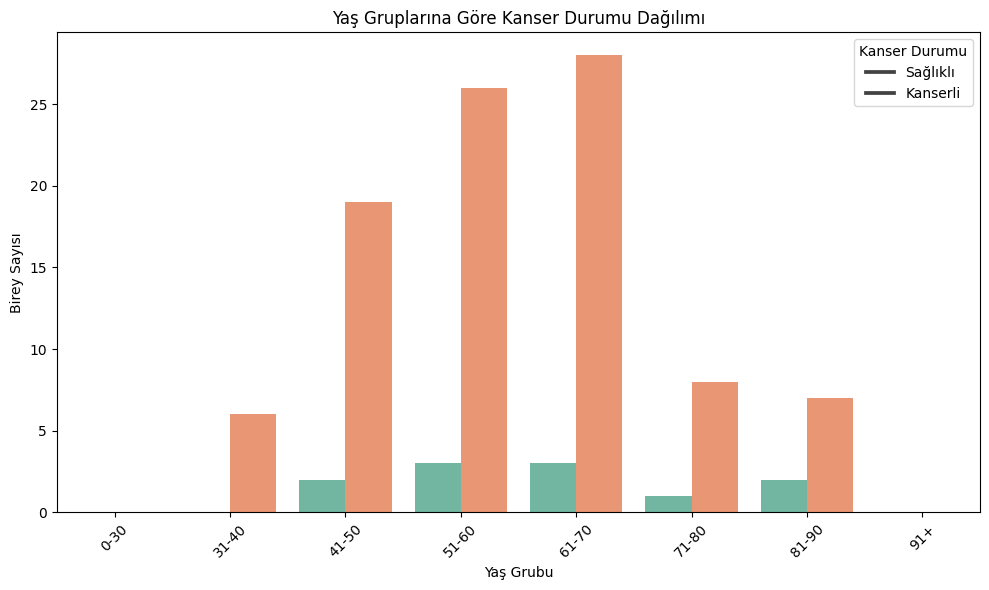

In [56]:
# Yaş gruplarını tanımlayalım
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']

# Yaş gruplarını oluştur
df['Age Group'] = pd.cut(df['Age at Initial Pathologic Diagnosis'], bins=bins, labels=labels, right=False)

# Yaş grupları ve Kanser Durumu'na göre gruplama yapalım
age_group_cancer_status = df.groupby(['Age Group', 'Vital Status']).size().reset_index(name='Count')

# Yaş grubu ile kanser durumu dağılımını görselleştirelim
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Count', hue='Vital Status', data=age_group_cancer_status, palette='Set2')
plt.title('Yaş Gruplarına Göre Kanser Durumu Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Birey Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Kanser Durumu', labels=['Sağlıklı', 'Kanserli'])
plt.tight_layout()
plt.show()

***Grafikten yola çıkarak en yüksek kanserli birey sayısının 61-70 yaş aralığında olduğunu görüyoruz***

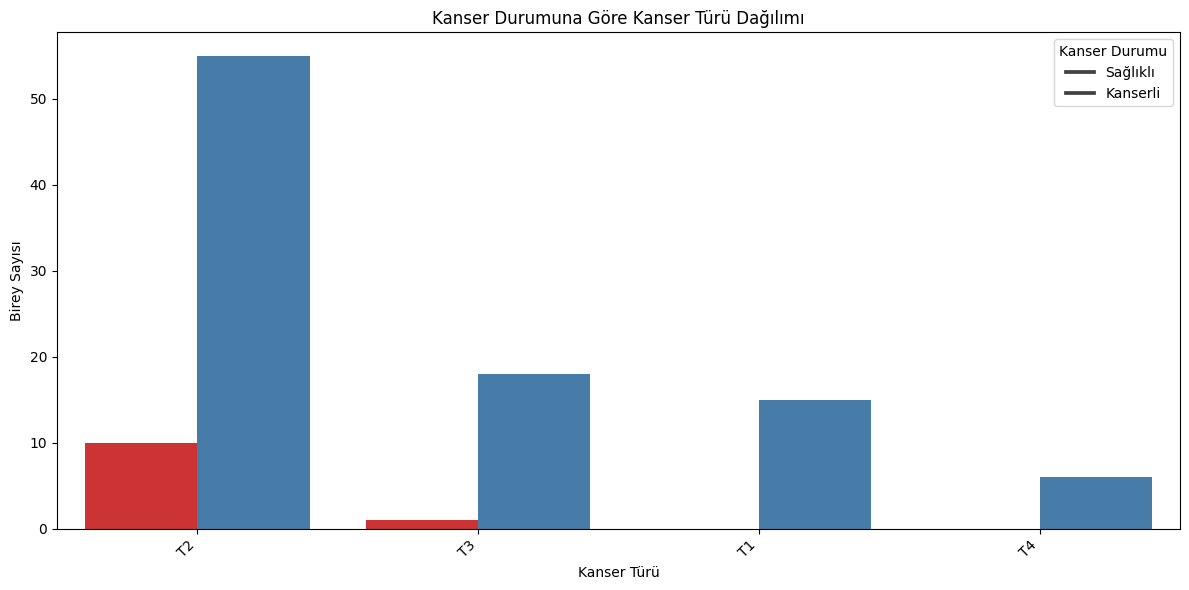

In [57]:
# Kanser Durumu ve Kanser Türüne göre gruplama yapalım
cancer_type_status = df.groupby(['Vital Status', 'Tumor']).size().reset_index(name='Count')

# Kanser durumu ve kanser türü dağılımını görselleştirelim
plt.figure(figsize=(12, 6))
sns.barplot(x='Tumor', y='Count', hue='Vital Status', data=cancer_type_status, palette='Set1')
plt.title('Kanser Durumuna Göre Kanser Türü Dağılımı')
plt.xlabel('Kanser Türü')
plt.ylabel('Birey Sayısı')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kanser Durumu', labels=['Sağlıklı', 'Kanserli'])
plt.tight_layout()
plt.show()

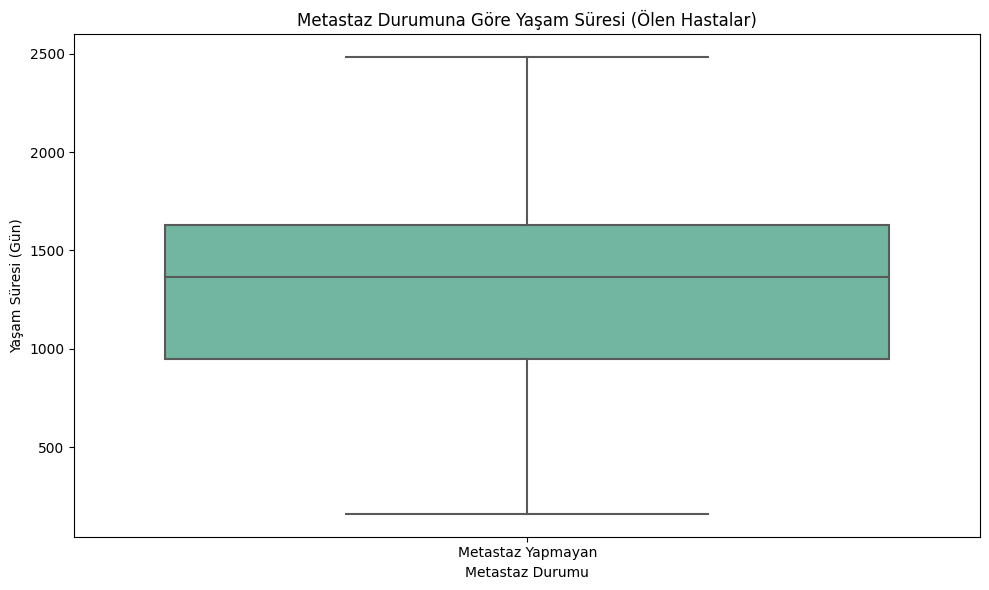

In [58]:
# 'OS event' ve 'Metastasis' sütunlarına göre metastaz durumu ve yaşam süresi analizi
# 'OS event' == 1 olan hastalar ölüm durumu gösteriyor ve 'Metastasis' sütunu ile bağlantı kuracağız

# Metastaz yapan ve yapmayan hastalar
df['Metastasis Status'] = df['Metastasis'].apply(lambda x: 'Metastaz Yapan' if x == 1 else 'Metastaz Yapmayan')

# 'OS event' == 1 olan hastalar için yaşam süresi verisini alalım (yani ölü hastalar)
df_os = df[df['OS event'] == 1]

# Boxplot ile metastaz yapan ve yapmayan hastaların yaşam sürelerini karşılaştıralım
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metastasis Status', y='OS Time', data=df_os, palette='Set2')
plt.title('Metastaz Durumuna Göre Yaşam Süresi (Ölen Hastalar)')
plt.xlabel('Metastaz Durumu')
plt.ylabel('Yaşam Süresi (Gün)')
plt.tight_layout()
plt.show()

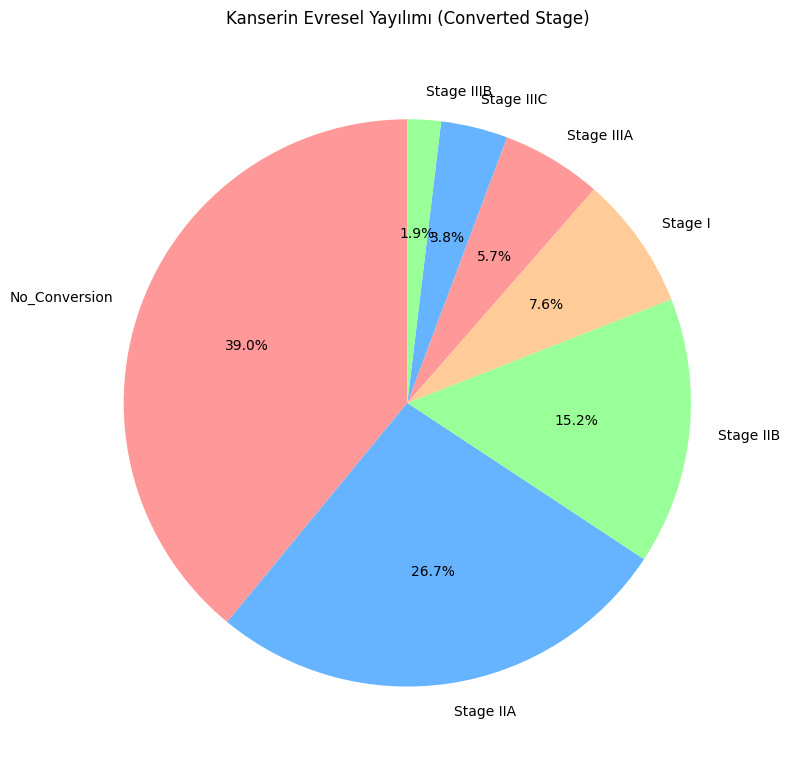

In [59]:
# AJCC Stage veya Converted Stage sütununa göre dağılımı hesapla
stage_counts = df['Converted Stage'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'])
plt.title('Kanserin Evresel Yayılımı (Converted Stage)')
plt.axis('equal')  # Pasta grafiğinin yuvarlak görünmesini sağlar
plt.tight_layout()
plt.show()

***Bu grafik, kanser hastalarının hangi evrelerde olduğunu ve hangi evrede daha fazla hastanın bulunduğunu göstermesi açısından önemlidir.***
***No_Conversion diliminin en büyük yüzdesel dilimi oluşturuyodur. Bu, kanser hastalarının büyük bir kısmının henüz evre değiştirmemiş olduğunu veya başlangıç evresinde olduğunu gösterir.***
***Ayrıca, Stage IIA ve Stage IIB evrelerinde de önemli sayıda hasta bulunmaktadır.***

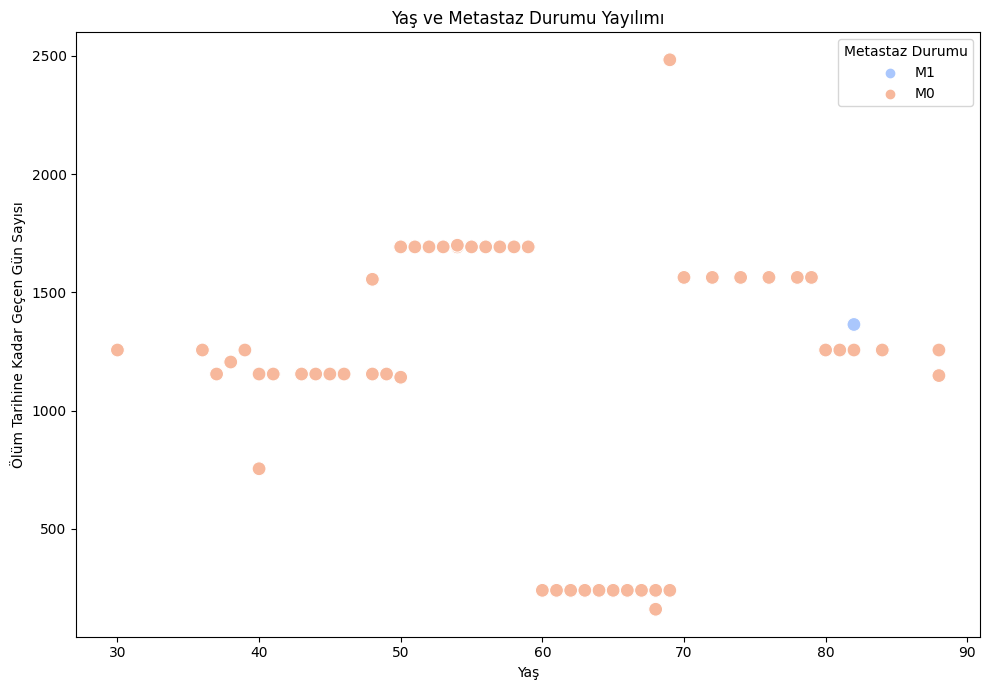

In [60]:
# Yaş ve Metastaz durumu için scatter plot oluştur
plt.figure(figsize=(10,7))

sns.scatterplot(data=df, x='Age at Initial Pathologic Diagnosis', y='Days to date of Death', hue='Metastasis', palette='coolwarm', s=100)

plt.title('Yaş ve Metastaz Durumu Yayılımı')
plt.xlabel('Yaş')
plt.ylabel('Ölüm Tarihine Kadar Geçen Gün Sayısı')
plt.legend(title='Metastaz Durumu')
plt.tight_layout()
plt.show()


**Metastaz olmayan (M0) bireylerin çoğunluğu 40 ila 80 yaş aralığındadır ve ölüm tarihine kadar geçen gün sayısı genellikle 500 ila 2000 gün arasında değişmektedir. Bu, metastaz olmayan bireylerin daha geniş bir yaş aralığında ve daha uzun süre hayatta kaldığını göstermektedir.**
**M0 durumundaki bireylerin ölüm tarihine kadar geçen gün sayısı daha geniş bir aralıkta dağılmışken, M1 durumundaki bireyler daha dar bir aralıkta toplanmıştır. Bu, metastazın varlığının hayatta kalma süresini etkilediğini ve metastaz olmayan bireylerin daha uzun süre hayatta kaldığını göstermektedir.**

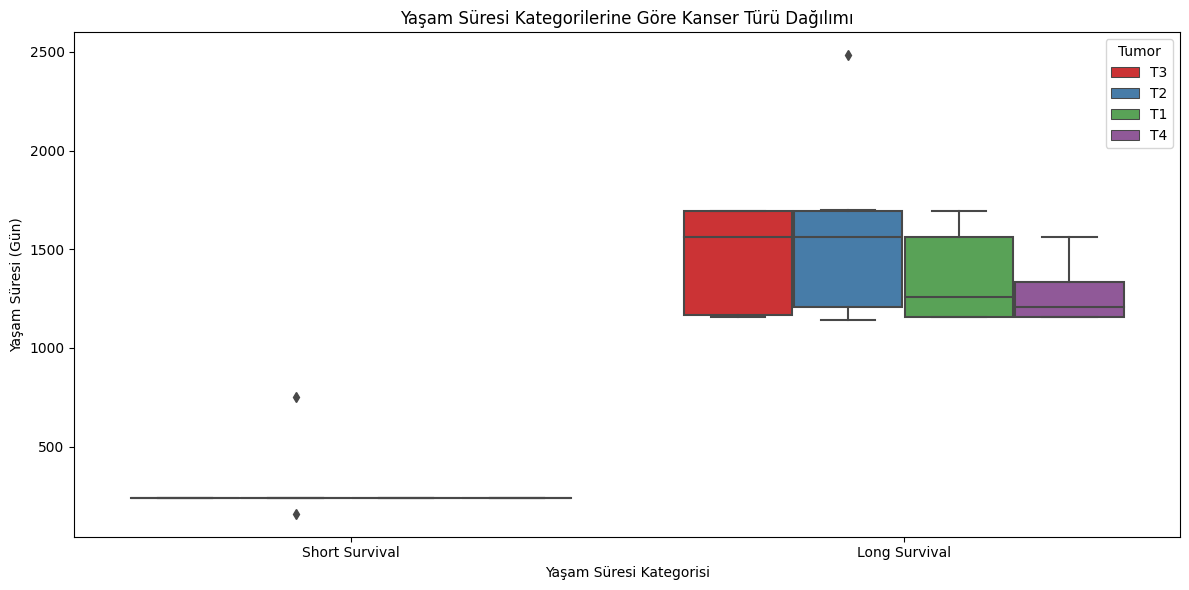

In [63]:
# Yaşam süresi ile sınıflandırma yapalım
df['Survival Category'] = df['Days to date of Death'].apply(lambda x: 'Long Survival' if x > 1000 else 'Short Survival')

# Yaşam süresi kategorilerine göre kanser türünün dağılımını boxplot ile görelim
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Survival Category', y='Days to date of Death', hue='Tumor', palette='Set1')
plt.title('Yaşam Süresi Kategorilerine Göre Kanser Türü Dağılımı')
plt.xlabel('Yaşam Süresi Kategorisi')
plt.ylabel('Yaşam Süresi (Gün)')
plt.tight_layout()
plt.show()


**T3 ve T2 türleri, diğer türlere göre daha yüksek yaşam süresi göstermektedir.**

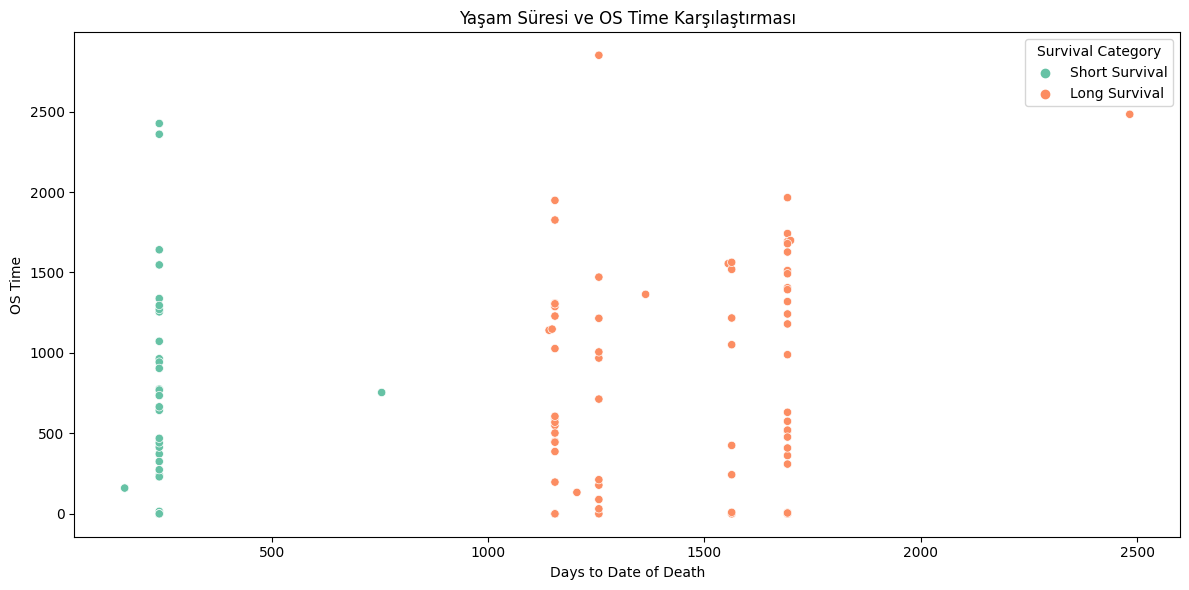

In [65]:
# Yaşam Süresi ve OS Time karşılaştırması
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Days to date of Death', y='OS Time', hue='Survival Category', palette='Set2')
plt.title('Yaşam Süresi ve OS Time Karşılaştırması')
plt.xlabel('Days to Date of Death')
plt.ylabel('OS Time')
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


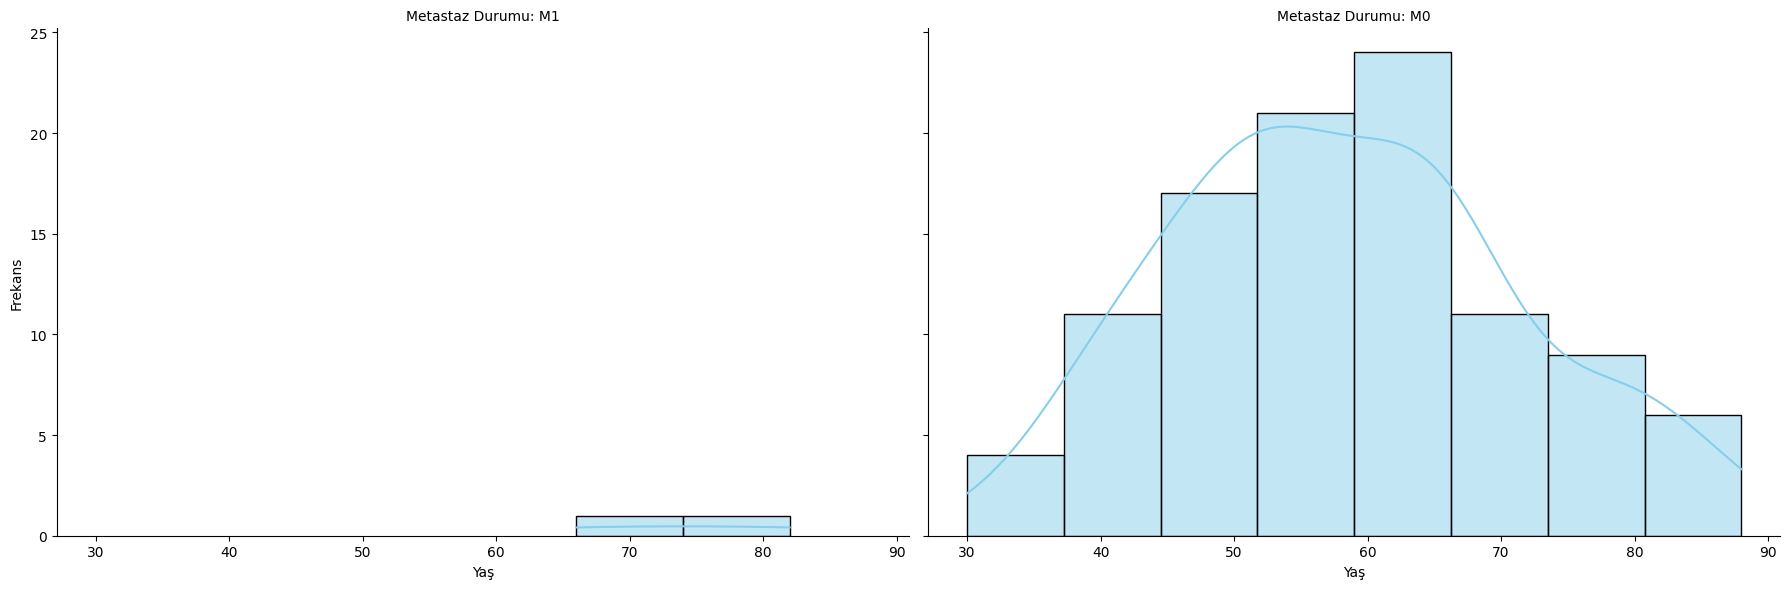

In [70]:
g = sns.FacetGrid(df, col='Metastasis', height=6, aspect=1.5)
g.map(sns.histplot, 'Age at Initial Pathologic Diagnosis', kde=True, color='skyblue')
g.set_axis_labels('Yaş', 'Frekans')
g.set_titles('Metastaz Durumu: {col_name}')
plt.tight_layout()
plt.show()



**Metastaz Durumu M1: Metastaz durumu M1 olan hastaların yaşları genellikle 70 ile 80 arasında yoğunlaşmıştır ve bu gruptaki hasta sayısı oldukça düşüktür.Metastaz Durumu M0: Metastaz durumu M0 olan hastaların yaş dağılımı daha geniş bir aralığa yayılmıştır ve 60 yaş civarında en yüksek frekansa sahiptir.**


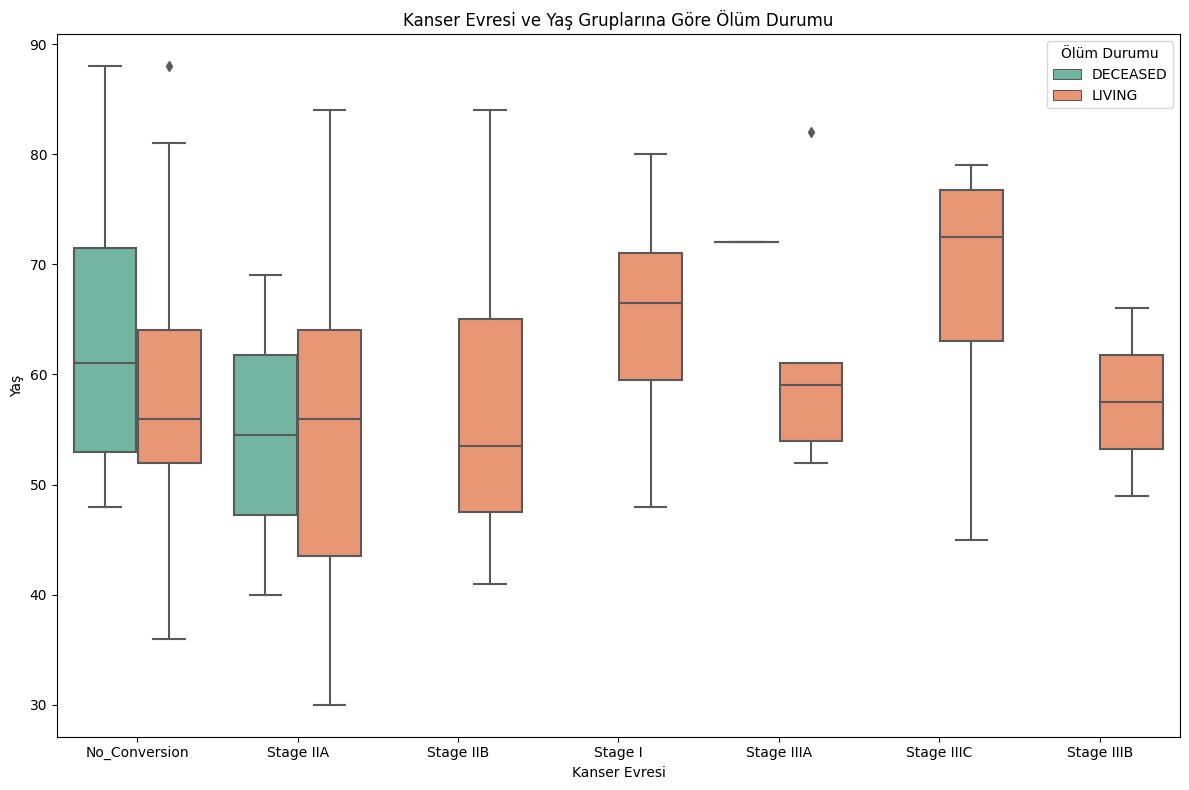

In [69]:
# Yaş ve Kanser Evresi ile Ölüm Durumunu İnceleyelim
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Converted Stage', y='Age at Initial Pathologic Diagnosis', hue='Vital Status', palette='Set2')
plt.title('Kanser Evresi ve Yaş Gruplarına Göre Ölüm Durumu')
plt.xlabel('Kanser Evresi')
plt.ylabel('Yaş')
plt.legend(title='Ölüm Durumu')
plt.tight_layout()
plt.show()


**No_Conversion evresinde en fazla hasta bulunmaktadır ve bu hastaların çoğu metastaz (M0) durumu göstermemektedir.**
**Stage IIA ve Stage IIB evrelerinde de hasta sayısı yüksektir ve bu evrelerde de metastaz (M0) durumu daha yaygındır.**